<a href="https://colab.research.google.com/github/hsw28/ca_imaging/blob/main/CEBRA1_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
! pip install cebra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 3.6 MB/s eta 0:00:00


In [3]:
import cebra
from cebra import CEBRA
import numpy as np

#location = cebra.load_data('/content/trainingLocation_trace.mat')
#cells = cebra.load_data('/content/trainingCells_trace.mat')
#eyeblink = cebra.load_data('/content/trainingEyeblink.mat')
#cells = cebra.load_data('/content/trainingCells_trim.mat')
#eyeblink = cebra.load_data('/content/trainingEyeblink_trim.mat')
#location = cebra.load_data('/content/trainingLocation_trim.mat')
#eyeblink = cebra.load_data('/content/trainingLocationEyeblink_trim.mat')

cells = cebra.load_data('/content/trainingCells_trim_2224.mat')
eyeblink = cebra.load_data('/content/trainingLocationEyeblink_trim_2224.mat')
location = cebra.load_data('/content/trainingLocation_2224.mat')

cells = np.transpose(cells)
location = np.transpose(location)
location = location[:,1]
eyeblink = np.transpose(eyeblink)






In [4]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jl
from cebra import CEBRA

from matplotlib.collections import LineCollection
import pandas as pd





In [5]:
def plot_hippocampus2d(ax, embedding, label, gray = False, idx_order = (0,1)):
     r_ind = label[:,0] == 10
     l_ind = label[:,0] == 20

     if not gray:
        r_cmap = 'autumn'
        l_cmap = 'winter'
        r_c = label[r_ind]
        l_c = label[l_ind]

     else:
        r_cmap = None
        l_cmap = None
        r_c = 'gray'
        l_c = 'gray'

     idx1, idx2 = idx_order
     r=ax.scatter(embedding [r_ind,0],
               embedding [r_ind,1],
               #embedding [r_ind,idx3],
               #embedding [r_ind,idx4],
               c=r_c,
               cmap=r_cmap, s=0.5)
     l=ax.scatter(embedding [l_ind,idx1],
               embedding [l_ind,idx2],
               #embedding [l_ind,idx3],
               #embedding [l_ind,idx4],
               c=l_c,
               cmap=l_cmap, s=0.5)


     return ax


In [6]:
def plot_hippocampus3d(ax, embedding, label, gray = False, idx_order = (0,1,2)):
     r_ind = label[:,0] == 10
     l_ind = label[:,0] == 20
     m_ind = label[:,0] == 0

     if not gray:
        r_cmap = 'autumn'
        l_cmap = 'winter'
        m_cmap = 'summer'
        r_c = label[r_ind]
        l_c = label[l_ind]
        m_c = label[m_ind]

     else:
        r_cmap = None
        l_cmap = None
        r_c = 'gray'
        l_c = 'gray'

     idx1, idx2, indx3 = idx_order
     m=ax.scatter(embedding [m_ind,0],
               embedding [m_ind,1],
               embedding [m_ind,2],
               #embedding [m_ind,idx4],
               c=m_c,
               cmap=m_cmap, s=0.5)
     r=ax.scatter(embedding [r_ind,0],
               embedding [r_ind,1],
               embedding [r_ind,2],
               #embedding [r_ind,idx4],
               c=r_c,
               cmap=r_cmap, s=0.5)
     l=ax.scatter(embedding [l_ind,0],
               embedding [l_ind,1],
               embedding [l_ind,2],
               #embedding [l_ind,idx4],
               c=l_c,
               cmap=l_cmap, s=0.5)


     return ax

In [5]:
def plot_hippocampus4d(ax, embedding, label, gray = False, idx_order = (0,1,2)):
     label = label[:,0] + label[:,1]
     r_ind = label[:] == 21 #A US
     l_ind = label[:] == 22 #B US
     cs_ind = label[:] == 12 #B CS
     us_ind = label[:] == 11 #A CS

     if not gray:
        r_cmap = 'spring' #pink
        l_cmap = 'summer' #green
        cs_cmap = 'autumn' #red
        us_cmap = 'winter' #blue
        r_c = label[r_ind]
        l_c = label[l_ind]
        cs_c = label[cs_ind]
        us_c = label[us_ind]

     else:
        r_cmap = None
        l_cmap = None
        r_c = 'gray'
        l_c = 'gray'

     idx1, idx2, indx3 = idx_order
     cs=ax.scatter(embedding [cs_ind,0],
               embedding [cs_ind,1],
               embedding [cs_ind,2],
               embedding [cs_ind,3],
               c=cs_c,
               cmap=cs_cmap, s=0.5)
     us=ax.scatter(embedding [us_ind,0],
               embedding [us_ind,1],
               embedding [us_ind,2],
               embedding [us_ind,3],
               c=us_c,
               cmap=us_cmap, s=0.5)
     r=ax.scatter(embedding [r_ind,0],
               embedding [r_ind,1],
               embedding [r_ind,2],
               embedding [r_ind,3],
               c=r_c,
               cmap=r_cmap, s=0.5)
     l=ax.scatter(embedding [l_ind,0],
               embedding [l_ind,1],
               embedding [l_ind,2],
               embedding [l_ind,3],
               c=l_c,
               cmap=l_cmap, s=0.5)


     return ax

In [6]:
def split_data(data1, data2, test_ratio):

    split_idx = int(len(data1)* (1-test_ratio))
    #cell_train = cells[:split_idx]
    cell_test = cells[split_idx:]
    #loc_train = location[:split_idx]
    loc_test = location[split_idx:]
    cell_train = cells
    loc_train = location

    return cell_train, cell_test, loc_train, loc_test

cell_train, cells_test, loc_train, loc_test = split_data(cells, location, 0.2)

eyeblink_train = eyeblink
loc_train = location
cell_train = cells


In [ ]:
eyeblink_train = eyeblink
loc_train = location
cell_train = cells


max_iterations = 10000 #default is 5000.
output_dimension = 4 #here, we set as a variable for hypothesis testing below.
cebra_loc_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        #temperature_mode = 'auto', #added
                        temperature=1,
                        output_dimension=output_dimension,
                        max_iterations=max_iterations,
                        distance='cosine',
                        device='cuda_if_available',
                        num_hidden_units=30, #change me
                        verbose=True)
#cebra_loc_model.fit(cell_train, loc_train)
cebra_loc_model.fit(cell_train, eyeblink_train)
cebra_loc = cebra_loc_model.transform(cell_train)
cebra_loc_model.save("cebra_loc_model.pt")

pos:  0.0019 neg:  5.3717 total:  5.3736 temperature:  1.0000:  42%|████▏     | 4186/10000 [05:41<06:55, 14.01it/s]

In [9]:
cebra_loc_model = cebra.CEBRA.load("cebra_loc_model.pt")
cebra_loc = cebra_loc_model.transform(cell_train)





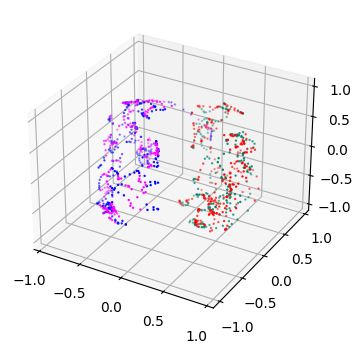

In [12]:

%matplotlib inline
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot(231, projection='3d')
#ax1 = plt.subplot(231)

ax1= plot_hippocampus4d(ax1, cebra_loc, eyeblink_train)




IndexError: ignored

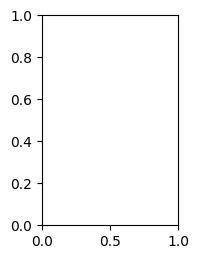

In [389]:
#%matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(6,6))

#ax1 = plt.subplot(231, projection='3d')
ax1 = plt.subplot(231)

ax1= plot_hippocampus(ax1, cebra_loc, loc_train)






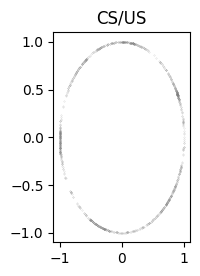

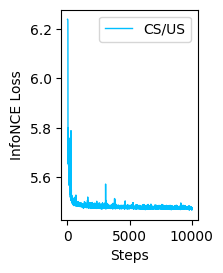

In [12]:
fig=plt.figure(figsize=(6,6))

#ax1=plt.subplot(231, projection = '3d')
ax1=plt.subplot(231)

#ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_loc, title='env only')
ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_loc, embedding_labels="grey", title='CS/US', )
#ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_loc)


fig = plt.figure(figsize=(6,6))
ax = plt.subplot(231)
ax = cebra.plot_loss(cebra_loc_model, color='deepskyblue', label='CS/US', ax=ax)

